In [121]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [122]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pandas as pd
import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import arrow
import gsw
import time

In [123]:
new_JS_bc = nc.Dataset('../preind_DIC/JS_diseq_preind_DIC_allup.nc')
new_JS_bc_DIC = (new_JS_bc['preindustrial_DIC']['preind_dic'])
old_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA_preind_091719.nc')
old_JS_bc_DIC = old_JS_bc['DIC']
presday_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
presday_JS_bc_DIC = presday_JS_bc['DIC']
presday_JS_bc_TA = presday_JS_bc['TA']
presday_JS_bc_sal = presday_JS_bc['vosaline']
presday_JS_bc_temp = presday_JS_bc['votemper']
presday_JS_bcOXY = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/tr_northDICTAOXY.nc')
presday_JS_bc_OXY= presday_JS_bcOXY['O2']

print(np.shape(old_JS_bc_DIC))
print(np.shape(new_JS_bc_DIC))

# fact = 0.8
# fig, axs = plt.subplots(2,6, figsize=(4*fact, 6*fact), facecolor='w', edgecolor='k')


(12, 40, 10, 30)
(12, 40, 10, 30)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


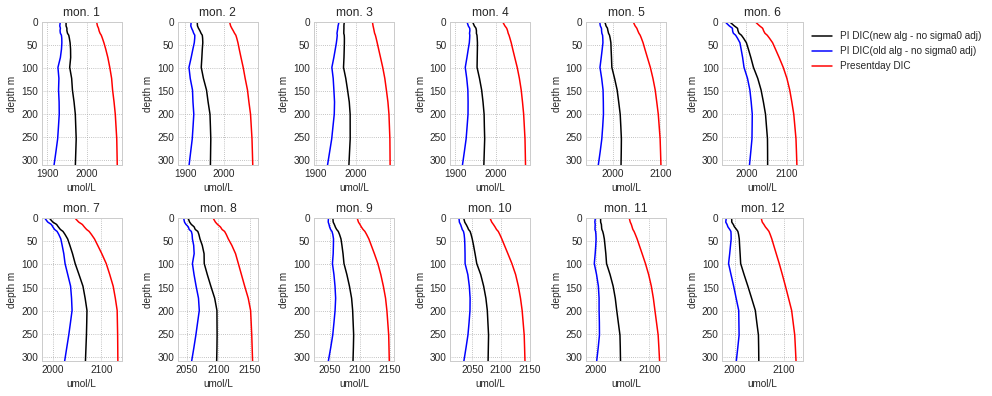

In [124]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]

fact = 0.4
fig, axs = plt.subplots(2,6, figsize=(34.7*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)

ty = 15
tx = 5
axs = axs.ravel()
for i in range(0,12):
    
    axs[i].plot( (np.nanmean(np.nanmean(new_JS_bc_DIC[i,:,:,:],axis = 1,),axis = 1)),\
                depths, color = 'k', \
                linestyle = '-', label = 'PI DIC(new alg - no sigma0 adj)')
    axs[i].plot( (np.nanmean(np.nanmean(old_JS_bc_DIC[i,:,:,:],axis = 1,),axis = 1)),\
            depths, color = 'b', \
            linestyle = '-', label = 'PI DIC(old alg - no sigma0 adj)')

    axs[i].plot( (np.nanmean(np.nanmean(presday_JS_bc_DIC[i,:,:,:],axis = 1,),axis = 1)),\
                depths, color = 'r', \
                linestyle = '-', label = 'Presentday DIC')
    axs[5].legend(bbox_to_anchor = [1,1])
    axs[i].grid();
    
for i in range(0,12):
    
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth m')
    axs[i].set_xlabel('umol/L')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


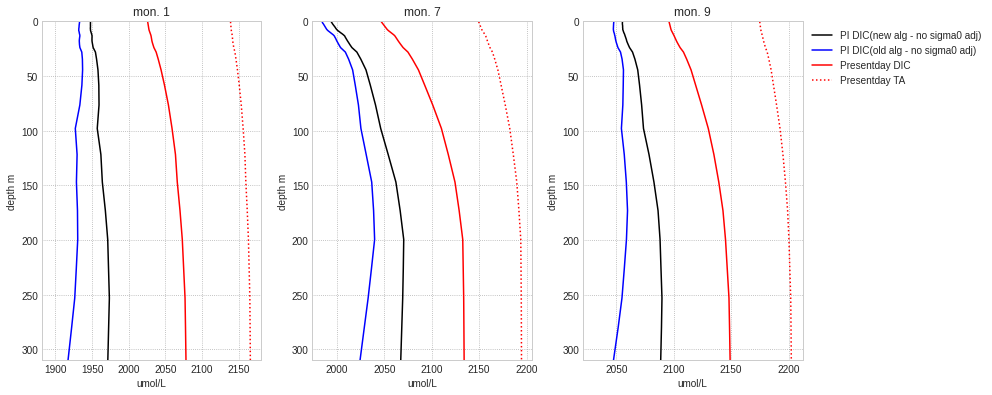

In [125]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]

fact = 0.4
fig, axs = plt.subplots(1,3, figsize=(34.7*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)

ty = 15
tx = 5
axs = axs.ravel()
for i in range(0,3):
    
    if i == 0: m = 1
    if i == 1: m = 7
    if i == 2: m = 9

    axs[i].plot( (np.nanmean(np.nanmean(new_JS_bc_DIC[m-1,:,:,:],axis = 1,),axis = 1)),\
                depths, color = 'k', \
                linestyle = '-', label = 'PI DIC(new alg - no sigma0 adj)')
    axs[i].plot( (np.nanmean(np.nanmean(old_JS_bc_DIC[m-1,:,:,:],axis = 1,),axis = 1)),\
            depths, color = 'b', \
            linestyle = '-', label = 'PI DIC(old alg - no sigma0 adj)')

    axs[i].plot( (np.nanmean(np.nanmean(presday_JS_bc_DIC[m-1,:,:,:],axis = 1,),axis = 1)),\
                depths, color = 'r', \
                linestyle = '-', label = 'Presentday DIC')
    axs[i].plot( (np.nanmean(np.nanmean(presday_JS_bc_TA[m-1,:,:,:],axis = 1,),axis = 1)),\
                depths, color = 'r', \
                linestyle = ':', label = 'Presentday TA')
    axs[2].legend(bbox_to_anchor = [1,1])
    axs[i].grid();
    axs[i].set_title(f'mon. {m}')
    
for i in range(0,3):
    
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    axs[i].set_ylabel('depth m')
    axs[i].set_xlabel('umol/L')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


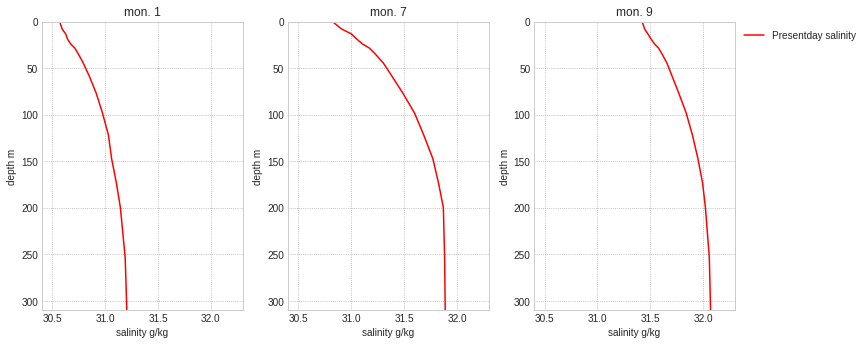

In [126]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]
fact = 0.35
fig, axs = plt.subplots(1,3, figsize=(34.7*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)

ty = 15
tx = 5
axs = axs.ravel()
for i in range(0,3):
    
    if i == 0: m = 1
    if i == 1: m = 7
    if i == 2: m = 9


    axs[i].plot( (np.nanmean(np.nanmean(presday_JS_bc_sal[m-1,:,:,:],axis = 1,),axis = 1)),\
                depths, color = 'r', \
                linestyle = '-', label = 'Presentday salinity')
    axs[2].legend(bbox_to_anchor = [1,1])
    axs[i].grid();
    axs[i].set_title(f'mon. {m}')
    
for i in range(0,3):
    axs[i].set_xlim([30.4,32.3])
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    axs[i].set_ylabel('depth m')
    axs[i].set_xlabel('salinity g/kg')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


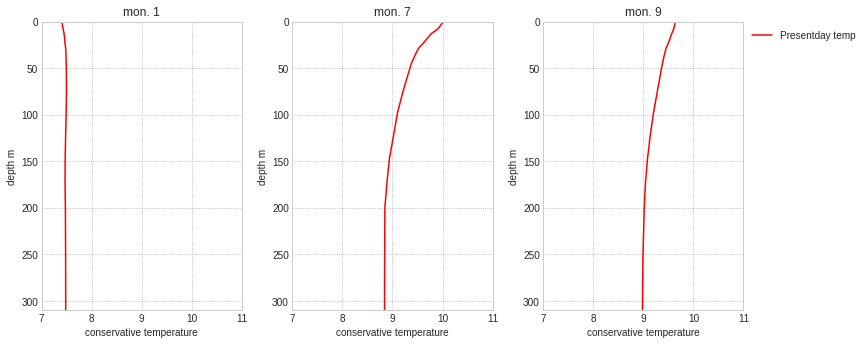

In [127]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]
fact = 0.35
fig, axs = plt.subplots(1,3, figsize=(34.7*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)

ty = 15
tx = 5
axs = axs.ravel()
for i in range(0,3):
    
    if i == 0: m = 1
    if i == 1: m = 7
    if i == 2: m = 9


    axs[i].plot( (np.nanmean(np.nanmean(presday_JS_bc_temp[m-1,:,:,:],axis = 1,),axis = 1)),\
                depths, color = 'r', \
                linestyle = '-', label = 'Presentday temp')
    axs[2].legend(bbox_to_anchor = [1,1])
    axs[i].grid();
    axs[i].set_title(f'mon. {m}')
    
for i in range(0,3):
    axs[i].set_xlim([7,11])
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    axs[i].set_ylabel('depth m')
    axs[i].set_xlabel('conservative temperature')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

In [128]:
def find_nearest(array, value):
    
    import numpy as np
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def co2_from_year(year):
    
    import pandas as pd
    '''takes a value for a year, converts year to int,
    and finds appropriate co2 values  from pandas lookup table. 
    if year < 1832, value is for year 1832, if year > 2018, value is for year 2018'''
    co2_rec = pd.read_csv('lawdome_maunaloa.csv') 
    whole_year = int(year)
    
    if whole_year >= 2018:
        whole_year = 2018     
        #('year > 2018, using value for 2018')       
    if whole_year <= 1832:
        whole_year = 1832
        #('year < 1832, using value for 1832')

    match = (co2_rec['YEAR'] == whole_year) 
    atmco2 = co2_rec['PPMCO2'][match]
    t_co2 = atmco2.values[0]
    return t_co2

def find_DIC_corresp_to_pco2(tsal, ttemp, tpco2, tta, pres_atm, depth_this):
    
    import numpy as np
    import mocsy
    import gsw
    
    steps = 10000
    tsal_r = np.zeros([steps])
    tsal_r[:] = tsal
    #convert to psu
    tsal_r_psu = tsal_r*35/35.16504
    
    ttemp_r = np.zeros([steps])
    ttemp_r[:] = ttemp
    #convert temperature to potential temperature
    ttemp_r_pot = gsw.pt_from_CT(tsal_r,ttemp_r)
    tta_r = np.zeros([steps])
    tta_r[:] = tta * 1e-3
    tpres_r = np.zeros([steps])
    tpres_r[:] = pres_atm
    depth_r = np.zeros([steps])
    depth_r[:] = depth_this
    tzero = np.zeros([steps])
    tlat = np.zeros([steps])
    tlat[:]=50
    
    end_d = 2400
    start_d = 600
    intvl = (end_d - start_d)/steps
    tdic_r = np.arange(start_d,end_d-0.1,intvl) * 1e-3
    #change to take potential temperature
    response_tup = mocsy.mvars(temp=ttemp_r_pot, sal=tsal_r_psu, alk=tta_r, dic=tdic_r, 
                       sil=tzero, phos=tzero, patm=tpres_r, depth=depth_r, lat=tzero, 
                        optcon='mol/m3', optt='Tpot', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup    
    
    diffmat = pco2 - tpco2
    idx, ans = find_nearest( diffmat,0 )
    
    if ans> 2:
        print('Danger, pco2 found >2 uatm from pco2 given')
#     print(idx)
#     print('difference between real pco2 and pco2 from calc. dic: ',ans)
#     print('DIC found this way:', tdic_r[idx]*1e3)
    fin_dic = tdic_r[idx]*1e3
    
    return fin_dic

def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):
    
    '''Just a mocsy wrapper - here we are using potential temp and\
    whatever depth we enter, salinity as psu '''
    import sys
    sys.path.append('/data/tjarniko/mocsy')
    import mocsy
    import numpy as np
    import gsw

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    #convert cons. temperature to potential temperature
    ttera_pot = gsw.pt_from_CT(tsra,ttera)
    
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth = np.ravel(depth_this)
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    #ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_pot, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tpot', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    
    return pH, OmegaA, pco2




def toy_preind_DIC_calculator(DIC, TA, O2, depth,sal, temp):
    
    
    import gsw
    import numpy as np
    
    # TJSJ calculate sigma0 
    sigma0 = gsw.sigma0(sal,temp)
    
    
    ## TJSJ find pycnal witnessed co2 (age from relationship with sigma0)
    params0 = 0.1301889490932413
    params1 = 3.8509914822057825
    params2 = 8.301166081413104 #change to 2015 since model year is 2015

    pycnal_last_at_surface = \
    2015 - (params0 *np.exp(-params1*(25.15-sigma0))+params2)
    pycnal_witnessed_atm_co2 = co2_from_year(pycnal_last_at_surface)
    
    # TJSJ calculate AOU, for which we need o2 solubility in umol/L
    osol = gsw.O2sol(sal,temp,0,-125,50)
    #convert osol to umol/L
    osol_umolL = osol*(1000/(1000+sigma0))
    AOU = osol_umolL - O2
    
    # TJSJ get stoichiometric AOU using (117/170)
    AOU_stoich = AOU * (117/170)
    
    # TJSJ get preformed DIC!
    preformed_DIC = DIC - AOU_stoich
    
    #TJSJ get preformed pco2 - the 0 is DEPTH the 1 is atmospheric pressure - and also disequilibrium
    
    pHr, OmAr, pco2r = \
    oned_moxy(sal, temp, preformed_DIC, TA, 1, 0)
    preformed_pco2 = pco2r
    diseqPCO2 = preformed_pco2 - pycnal_witnessed_atm_co2

    #get preindustrial preformed pco2
    PIpreformed_pco2 = diseqPCO2 + 284
    #
    
    #get preformed DIC
    PIpreformed_DIC = find_DIC_corresp_to_pco2(sal, temp, PIpreformed_pco2, TA, 1, 0)

    
    deltaDIC = preformed_DIC - PIpreformed_DIC
    
    finalPI_DIC = DIC - deltaDIC
    
    return sigma0, pycnal_last_at_surface, pycnal_witnessed_atm_co2, AOU, preformed_DIC, preformed_pco2, PIpreformed_pco2, PIpreformed_DIC, deltaDIC, finalPI_DIC



In [129]:
osol = gsw.O2sol(sal,temp,0,-125,50)

2046.8125

In [130]:
new_JS_bc = nc.Dataset('../preind_DIC/JS_diseq_preind_DIC_allup.nc')
new_JS_bc_DIC = (new_JS_bc['preindustrial_DIC']['preind_dic'])
old_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA_preind_091719.nc')
old_JS_bc_DIC = old_JS_bc['DIC']
presday_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
presday_JS_bc_DIC = presday_JS_bc['DIC']
presday_JS_bc_TA = presday_JS_bc['TA']
presday_JS_bc_sal = presday_JS_bc['vosaline']
presday_JS_bc_temp = presday_JS_bc['votemper']
presday_JS_bcOXY = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/tr_northDICTAOXY.nc')
presday_JS_bc_OXY= presday_JS_bcOXY['O2']


# # fact = 0.8
# # fig, axs = plt.subplots(2,6, figsize=(4*fact, 6*fact), facecolor='w', edgecolor='k')
# presday_JS_bc_DIC[0,:,:,:]
# m = 1
# print(type(presday_JS_bc_DIC[m-1,:,:,:]))
# DIC_jan = np.nanmean(presday_JS_bc_DIC[m-1,:,:,:],axis = 1)

No handles with labels found to put in legend.


Text(0.5, 0.98, 'JAN VALUES (ALL UNITS MODEL UNITS, AOU in UMOL/L)')

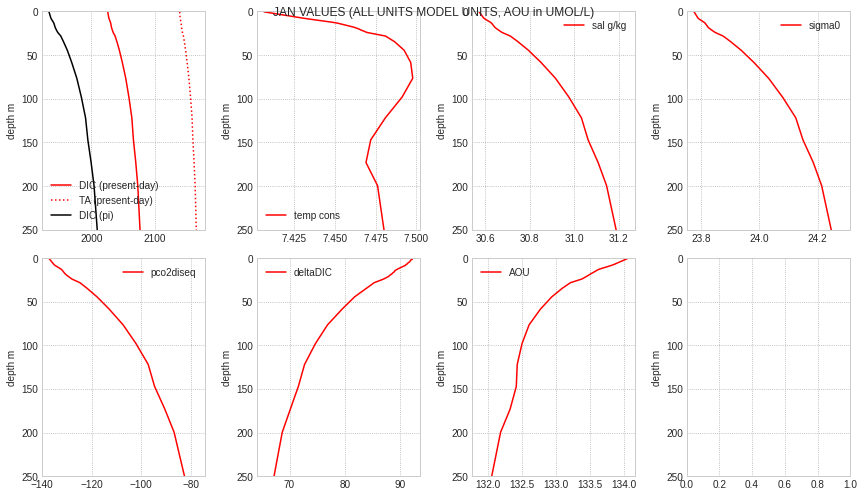

In [138]:
m = 1
DIC_jan = (np.nanmean(np.nanmean(presday_JS_bc_DIC[m-1,:,:,:],axis = 1,),axis = 1))
TA_jan = (np.nanmean(np.nanmean(presday_JS_bc_TA[m-1,:,:,:],axis = 1,),axis = 1))
temp_jan = (np.nanmean(np.nanmean(presday_JS_bc_temp[m-1,:,:,:],axis = 1,),axis = 1))
sal_jan = (np.nanmean(np.nanmean(presday_JS_bc_sal[m-1,:,:,:],axis = 1,),axis = 1))
OXY_jan = (np.nanmean(np.nanmean(presday_JS_bc_OXY[m-1,:,:,:],axis = 1,),axis = 1))

AOU_jan = np.zeros_like(OXY_jan)
age_jan = np.zeros_like(OXY_jan)
sigma0_jan = np.zeros_like(OXY_jan)
pco2diseq_jan = np.zeros_like(OXY_jan)
deltaDIC_jan = np.zeros_like(OXY_jan)

for i in range(0,len(AOU_jan)):
    DIC = DIC_jan[i]; TA = TA_jan[i]; temp = temp_jan[i]; sal = sal_jan[i]; OXY = OXY_jan[i];
    depth = np.zeros_like(DIC)
    sigma0, pycnal_last_at_surface, pycnal_witnessed_atm_co2,\
AOU, preformed_DIC, preformed_pco2, PIpreformed_pco2,\
PIpreformed_DIC, deltaDIC, finalPI_DIC = toy_preind_DIC_calculator(DIC, TA, OXY, depth,sal, temp)

    AOU_jan[i] = AOU
    age_jan[i] = 2015-pycnal_last_at_surface
    sigma0_jan[i] = sigma0
    pco2diseq_jan[i] = preformed_pco2-pycnal_witnessed_atm_co2
    deltaDIC_jan[i] = deltaDIC

# = presday_JS_bc['DIC']
# presday_JS_bc_TA = presday_JS_bc['TA']
# presday_JS_bc_sal = presday_JS_bc['vosaline']
# presday_JS_bc_temp = presday_JS_bc['votemper']

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]
fact = 0.35
numplot = 6

fig, axs = plt.subplots(2,4, figsize=(34.7*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot( DIC_jan,depths, color = 'r', linestyle = '-', label = 'DIC (present-day)')
axs[0].plot( TA_jan,depths, color = 'r', linestyle = ':', label = 'TA (present-day)')
axs[0].plot( DIC_jan-deltaDIC_jan,depths, color = 'k', linestyle = '-', label = 'DIC (pi)')

axs[1].plot(temp_jan,depths, color = 'r', linestyle = '-', label = 'temp cons ')

axs[2].plot(sal_jan,depths, color = 'r', linestyle = '-', label = 'sal g/kg')

axs[3].plot(sigma0_jan,depths, color = 'r', linestyle = '-', label = 'sigma0')

axs[4].plot(pco2diseq_jan,depths, color = 'r', linestyle = '-', label = 'pco2diseq')

axs[5].plot(deltaDIC_jan,depths, color = 'r', linestyle = '-', label = 'deltaDIC')

axs[6].plot(AOU_jan,depths, color = 'r', linestyle = '-', label = 'AOU')

#axs[3].plot(AOU_jan,depths, color = 'r', linestyle = '-', label = 'AOU umol/L')
#     axs[2].legend(bbox_to_anchor = [1,1])
#     axs[i].grid();
#     axs[i].set_title(f'mon. {m}')
    
for i in range(0,8):
    axs[i].legend(loc = 'best')
    axs[i].set_ylim([0,250])
    axs[i].invert_yaxis()
    axs[i].set_ylabel('depth m')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

plt.suptitle('JAN VALUES (ALL UNITS MODEL UNITS, AOU in UMOL/L)')

In [141]:
age_jan

masked_array(data=[8.301823 , 8.301827 , 8.301832 , 8.301837 , 8.301842 ,
                   8.3018465, 8.301851 , 8.301856 , 8.301865 , 8.301877 ,
                   8.301889 , 8.301903 , 8.301916 , 8.301926 , 8.301932 ,
                   8.301939 , 8.301947 , 8.301954 , 8.30197  , 8.301994 ,
                   8.302032 , 8.302129 , 8.302231 , 8.302388 , 8.302611 ,
                   8.302921 , 8.303274 , 8.303678 , 8.303927 , 8.304332 ,
                   8.304701 , 8.304945 , 8.305206 , 8.3053   , 8.305385 ,
                   8.305471 , 8.30556  , 8.305651 , 8.305743 , 8.305838 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

No handles with labels found to put in legend.


Text(0.5, 0.98, 'jul VALUES (ALL UNITS MODEL UNITS, AOU in UMOL/L)')

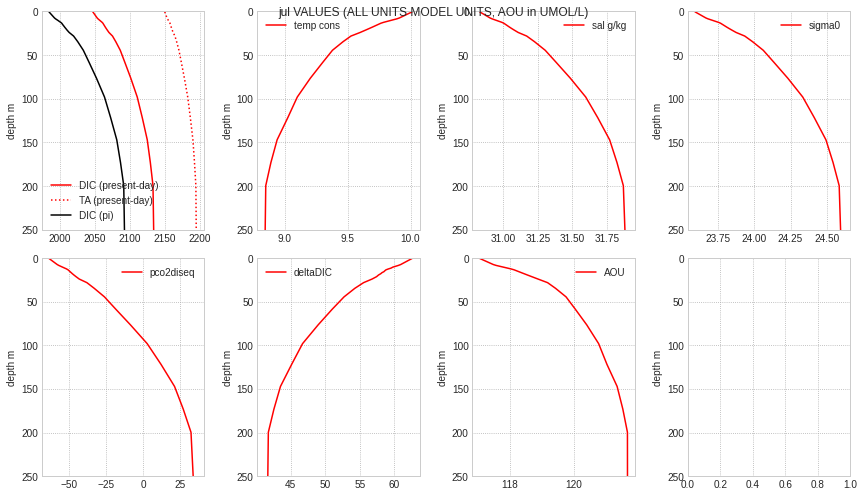

In [139]:
m = 7
DIC_jul = (np.nanmean(np.nanmean(presday_JS_bc_DIC[m-1,:,:,:],axis = 1,),axis = 1))
TA_jul = (np.nanmean(np.nanmean(presday_JS_bc_TA[m-1,:,:,:],axis = 1,),axis = 1))
temp_jul = (np.nanmean(np.nanmean(presday_JS_bc_temp[m-1,:,:,:],axis = 1,),axis = 1))
sal_jul = (np.nanmean(np.nanmean(presday_JS_bc_sal[m-1,:,:,:],axis = 1,),axis = 1))
OXY_jul = (np.nanmean(np.nanmean(presday_JS_bc_OXY[0,:,:,:],axis = 1,),axis = 1))

AOU_jul = np.zeros_like(OXY_jul)
age_jul = np.zeros_like(OXY_jul)
sigma0_jul = np.zeros_like(OXY_jul)
pco2diseq_jul = np.zeros_like(OXY_jul)
deltaDIC_jul = np.zeros_like(OXY_jul)

for i in range(0,len(AOU_jul)):
    DIC = DIC_jul[i]; TA = TA_jul[i]; temp = temp_jul[i]; sal = sal_jul[i]; OXY = OXY_jul[i];
    depth = np.zeros_like(DIC)
    sigma0, pycnal_last_at_surface, pycnal_witnessed_atm_co2,\
AOU, preformed_DIC, preformed_pco2, PIpreformed_pco2,\
PIpreformed_DIC, deltaDIC, finalPI_DIC = toy_preind_DIC_calculator(DIC, TA, OXY, depth,sal, temp)

    AOU_jul[i] = AOU
    age_jul[i] = 2015-pycnal_last_at_surface
    sigma0_jul[i] = sigma0
    pco2diseq_jul[i] = preformed_pco2-pycnal_witnessed_atm_co2
    deltaDIC_jul[i] = deltaDIC

# = presday_JS_bc['DIC']
# presday_JS_bc_TA = presday_JS_bc['TA']
# presday_JS_bc_sal = presday_JS_bc['vosaline']
# presday_JS_bc_temp = presday_JS_bc['votemper']

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]
fact = 0.35
numplot = 6

fig, axs = plt.subplots(2,4, figsize=(34.7*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot( DIC_jul,depths, color = 'r', linestyle = '-', label = 'DIC (present-day)')
axs[0].plot( TA_jul,depths, color = 'r', linestyle = ':', label = 'TA (present-day)')
axs[0].plot( DIC_jul-deltaDIC_jul,depths, color = 'k', linestyle = '-', label = 'DIC (pi)')

axs[1].plot(temp_jul,depths, color = 'r', linestyle = '-', label = 'temp cons ')

axs[2].plot(sal_jul,depths, color = 'r', linestyle = '-', label = 'sal g/kg')

axs[3].plot(sigma0_jul,depths, color = 'r', linestyle = '-', label = 'sigma0')

axs[4].plot(pco2diseq_jul,depths, color = 'r', linestyle = '-', label = 'pco2diseq')

axs[5].plot(deltaDIC_jul,depths, color = 'r', linestyle = '-', label = 'deltaDIC')

axs[6].plot(AOU_jul,depths, color = 'r', linestyle = '-', label = 'AOU')


#axs[3].plot(AOU_jul,depths, color = 'r', linestyle = '-', label = 'AOU umol/L')
#     axs[2].legend(bbox_to_anchor = [1,1])
#     axs[i].grid();
#     axs[i].set_title(f'mon. {m}')
    
for i in range(0,8):
    axs[i].legend(loc = 'best')
    axs[i].set_ylim([0,250])
    axs[i].invert_yaxis()
    axs[i].set_ylabel('depth m')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

plt.suptitle('jul VALUES (ALL UNITS MODEL UNITS, AOU in UMOL/L)')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'sep VALUES (ALL UNITS MODEL UNITS, AOU in UMOL/L)')

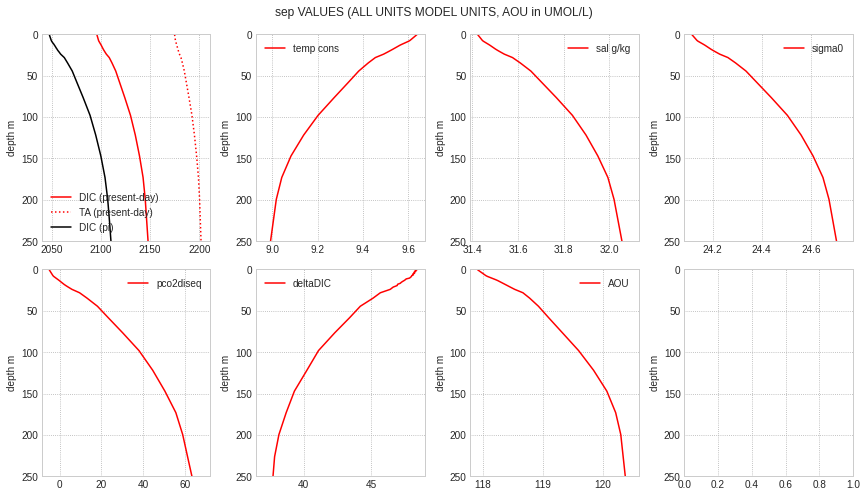

In [140]:
m = 9
DIC_sep = (np.nanmean(np.nanmean(presday_JS_bc_DIC[m-1,:,:,:],axis = 1,),axis = 1))
TA_sep = (np.nanmean(np.nanmean(presday_JS_bc_TA[m-1,:,:,:],axis = 1,),axis = 1))
temp_sep = (np.nanmean(np.nanmean(presday_JS_bc_temp[m-1,:,:,:],axis = 1,),axis = 1))
sal_sep = (np.nanmean(np.nanmean(presday_JS_bc_sal[m-1,:,:,:],axis = 1,),axis = 1))
OXY_sep = (np.nanmean(np.nanmean(presday_JS_bc_OXY[0,:,:,:],axis = 1,),axis = 1))

AOU_sep = np.zeros_like(OXY_sep)
age_sep = np.zeros_like(OXY_sep)
sigma0_sep = np.zeros_like(OXY_sep)
pco2diseq_sep = np.zeros_like(OXY_sep)
deltaDIC_sep = np.zeros_like(OXY_sep)

for i in range(0,len(AOU_sep)):
    DIC = DIC_sep[i]; TA = TA_sep[i]; temp = temp_sep[i]; sal = sal_sep[i]; OXY = OXY_sep[i];
    depth = np.zeros_like(DIC)
    sigma0, pycnal_last_at_surface, pycnal_witnessed_atm_co2,\
AOU, preformed_DIC, preformed_pco2, PIpreformed_pco2,\
PIpreformed_DIC, deltaDIC, finalPI_DIC = toy_preind_DIC_calculator(DIC, TA, OXY, depth,sal, temp)

    AOU_sep[i] = AOU
    age_sep[i] = 2015-pycnal_last_at_surface
    sigma0_sep[i] = sigma0
    pco2diseq_sep[i] = preformed_pco2-pycnal_witnessed_atm_co2
    deltaDIC_sep[i] = deltaDIC

# = presday_JS_bc['DIC']
# presday_JS_bc_TA = presday_JS_bc['TA']
# presday_JS_bc_sal = presday_JS_bc['vosaline']
# presday_JS_bc_temp = presday_JS_bc['votemper']

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]
fact = 0.35
numplot = 6

fig, axs = plt.subplots(2,4, figsize=(34.7*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot( DIC_sep,depths, color = 'r', linestyle = '-', label = 'DIC (present-day)')
axs[0].plot( TA_sep,depths, color = 'r', linestyle = ':', label = 'TA (present-day)')
axs[0].plot( DIC_sep-deltaDIC_sep,depths, color = 'k', linestyle = '-', label = 'DIC (pi)')

axs[1].plot(temp_sep,depths, color = 'r', linestyle = '-', label = 'temp cons ')

axs[2].plot(sal_sep,depths, color = 'r', linestyle = '-', label = 'sal g/kg')

axs[3].plot(sigma0_sep,depths, color = 'r', linestyle = '-', label = 'sigma0')

axs[4].plot(pco2diseq_sep,depths, color = 'r', linestyle = '-', label = 'pco2diseq')

axs[5].plot(deltaDIC_sep,depths, color = 'r', linestyle = '-', label = 'deltaDIC')

axs[6].plot(AOU_sep,depths, color = 'r', linestyle = '-', label = 'AOU')


#axs[3].plot(AOU_sep,depths, color = 'r', linestyle = '-', label = 'AOU umol/L')
#     axs[2].legend(bbox_to_anchor = [1,1])
#     axs[i].grid();
#     axs[i].set_title(f'mon. {m}')
    
for i in range(0,8):
    axs[i].legend(loc = 'best')
    axs[i].set_ylim([0,250])
    axs[i].invert_yaxis()
    axs[i].set_ylabel('depth m')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

plt.suptitle('sep VALUES (ALL UNITS MODEL UNITS, AOU in UMOL/L)')

#axs[3].plot(AOU_sep,depths, color = 'r', linestyle = '-', label = 'AOU umol/L')
#     axs[2].legend(bbox_to_anchor = [1,1])
#     axs[i].grid();
#     axs[i].set_title(f'mon. {m}')
    
for i in range(0,8):
    axs[i].legend(loc = 'best')
    axs[i].set_ylim([0,250])
    axs[i].invert_yaxis()
    axs[i].set_ylabel('depth m')
    axs[i].grid(b=True, which='major', color='darkgrey', linestyle=':')
plt.tight_layout()

plt.suptitle('sep VALUES (ALL UNITS MODEL UNITS, AOU in UMOL/L)')

In [134]:
print('~~~INPUTS (all model units)~~~~')
DIC = 2150; TA = 2200; OXY = 200; depth = 0; sal = 34;  temp = 7
print(f'DIC: {DIC}, TA: {TA}, OXY: {OXY}')
print(f'sal: {sal}, temp: {temp}')
print(f'depth, m (DOESNT MATTER FOR THIS CALCULATION! AS WE HAVE LEARNT TO OUR DISMAY): {depth})')
print('')

sigma0, pycnal_last_at_surface, pycnal_witnessed_atm_co2,\
AOU, preformed_DIC, preformed_pco2, PIpreformed_pco2,\
PIpreformed_DIC, deltaDIC, finalPI_DIC = toy_preind_DIC_calculator(DIC, TA, OXY, depth,sal, temp)

print('~~~OUTPUTS (all model units)~~~~')
print(f'sigma0: {sigma0}')
print(f'pycnal last at surface: {pycnal_last_at_surface}')
print(f'pycnal_witnessed_atm_co2: {pycnal_witnessed_atm_co2}')
print(f'AOU: {AOU}')
print(f'preformed_DIC: {preformed_DIC}')
print(f'preformed_pco2: {preformed_pco2}')
print(f'PIpreformed_pco2: {PIpreformed_pco2}')
print(f'PIpreformed_DIC: {PIpreformed_DIC}')
print(f'finalPI_DIC: {finalPI_DIC}')

~~~INPUTS (all model units)~~~~
DIC: 2150, TA: 2200, OXY: 200
sal: 34, temp: 7
depth, m (DOESNT MATTER FOR THIS CALCULATION! AS WE HAVE LEARNT TO OUR DISMAY): 0)

~~~OUTPUTS (all model units)~~~~
sigma0: 26.507752150228725
pycnal last at surface: 1982.412263588211
pycnal_witnessed_atm_co2: 341.45
AOU: 88.36319644392893
preformed_DIC: 2089.185329506237
preformed_pco2: [516.11697165]
PIpreformed_pco2: [458.66697165]
PIpreformed_DIC: 2072.759999999591
finalPI_DIC: 2133.574670493354


    &nambdy_index ! open boundaries - definition ("key_bdy")
    !-----------------------------------------------------------------------
        ctypebdy  = 'N'
        nbdyind   = 896  ! i-index for segment
        nbdybeg   = 42   ! j-index for segment beginning
        nbdyend   = 71   ! j-index for segment end

In [143]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
spac = 1
mask_bdy = w['vmask'][0,:,895-spac,41:71]
print(np.shape(mask_bdy))


w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
#print(w['e2t'][0,375:470,10])

boundary_xs = w['e1t'][0,895-spac,41:71]
depths = w['gdept_1d'][:]
#print(w['e3t_1d'][0])
area = np.zeros([40,30])
xdir = np.zeros([40,30])
zdir = np.zeros([40,30])
for i in range(0,40):
    zdir[i,:]=w['e3t_1d'][0,i]
for i in range(0,30):
    xdir[:,i]=boundary_xs[i]
    
area = xdir * zdir

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
mask_bdy = w['umask'][0,:,375:470,10]

days = ['0101','0201','0301','0401','0501','0601','0701','0801','0901','1001','1101','1201']
#w1 = nc.Dataset(f'/data/tjarniko/results/BASERUN_EXP/PI5/ncs/{tf}')
day1ofmonth_velocities_PI5 = np.zeros([12,40,30])
day1ofmonth_transports_PI5 = np.zeros([12,40,30])
### get 

UVEL_JS = np.zeros([12,40,30])
s = time.time()
for i in range(0,12):
    
    w = f'/data/tjarniko/results/BASERUN_EXP/PI5/ncs/SKOG_1d_*_grid_V_2015*{days[i]}.nc'
    w2 = glob.glob(w)
    tdat = nc.Dataset(w2[0])
    #print(tdat)
    VVEL = tdat['vomecrty'][0,:,895-spac,41:71]
    day1ofmonth_velocities_PI5[i,:,:] = VVEL
    day1ofmonth_transports_PI5[i,:,:] = VVEL*area

(40, 30)


In [151]:
tdat['vomecrty'][0,:,895-spac,41:71]
print(np.nanmax(tdat['vomecrty'][0,:,896-10,41:71]))
print(area[26,20])


0.23049086
9903.871497581911


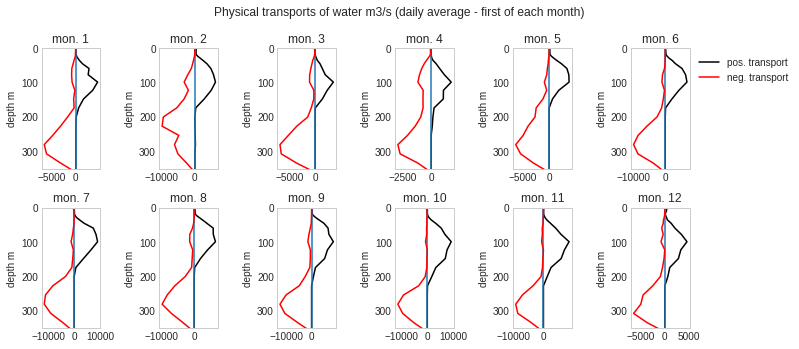

In [152]:
### TRANSPORTS OF WATER

pos_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
pos_transports_pi5[pos_transports_pi5<0] = 0
neg_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
neg_transports_pi5[neg_transports_pi5>0] = 0

fig, axs = plt.subplots(2,6, figsize=(32*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    trans_pos = np.nansum(pos_transports_pi5[i,:,:], axis =1)
    axs[i].plot(trans_pos,depths[0,:], color = 'k', label = 'pos. transport')
    axs[i].axvline(x=0)
    trans_neg = np.nansum(neg_transports_pi5[i,:,:], axis =1)
    axs[i].plot(trans_neg,depths[0,:], color = 'r', label = 'neg. transport')
    #axs[i].plot(trans_neg+trans_pos,depths[0,:], color = 'b', label = 'tot. transport')

    
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,350])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth m')
    
    
axs[5].legend(bbox_to_anchor = [1, 1])    
plt.suptitle('Physical transports of water m3/s (daily average - first of each month)')
plt.tight_layout()